In [54]:
# 패키지 설치
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [50]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state = 1): # 선언 초기화 동시에 + 생성자
        self.eta = eta #  학습률
        self.n_iter = n_iter # 반복문 반복 횟수
        self.random_state = random_state # 가중치를 무작위로 초기화(리셋)를 위한 임의의 수 생성을 위함
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state) # 임의의 수 생성기 (random generator) 
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1 + X.shape[1]) # 평균이 0, 표준편차는 0.01, 데이터 크기는 행의 개수
        self.errors_ = []

        # 50번 반복
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target -self.predict(xi)) # y관측값에서 xi를 대입한 y예측값을 뺀 값에 학습률을 곱한 걸 업데이트
                self.w_[1:] += update * xi # 가중치에 갱신된 값에 x값을 곱해준 값을 더해줌.
                self.w_[0] += update # 임계값에 새로 갱신된 값을 더해줌
                errors += int(update != 0.0) # 오차는 새로 갱신된 값이 0이 아닐 경우 더해줌.
            self.errors_.append(errors) # 오차를 리스트에 추가
    
    # 가중치 * X + 임계값 = Y의 값(계단함수에 들어갈 인풋값)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # 행렬곱 (x와 가중치의 곱) 후에 임계값을 더해줌.
        
    # 단위 계단 함수를 적용
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1) # 가중치와 x의 곱 + 임계값으로 계단함수를 통해 1이나 -1을 반환

In [22]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [51]:
### 붓꽃 퍼셉트론

df = pd.read_csv("iris.csv", header=None) # 파일 가져오기
df.tail() # 제대로 가져왔는지 확인
# 컬럼 순서 : sepal length, sepal width, petal length, petal width, class 

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


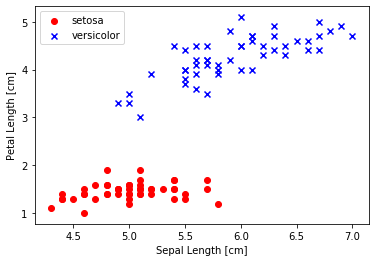

In [52]:
# 붓꽃 중 setosa와 versicolor를 선택
y = df.iloc[0:100,4].values # 4번 컬럼인 붓꽃 종류 데이터를 100개 가져옴.
y = np.where(y == "Iris-setosa", -1, 1) # 붓꽃 이름을 setosa이면 -1로 아니면 1로(숫자로 나눠야 나중에 편함)

# 꽃받침 길이 & 꽃잎 길이 추출
X = df.iloc[0:100, [0, 2]].values # sepal length와 petal length 이므로 0과 2의 인덱스로 가져오면 됨.

# 산점도 그리기
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa") # setosa에는 붉은 o표시
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor") # versicolor에는 파란 x표시

plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal Length [cm]")
plt.legend(loc="upper left")

plt.show()

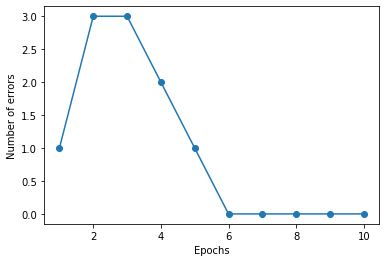

In [53]:
# 붓꽃으로 퍼셉트론 훈련

ppn = Perceptron(eta= 0.1, n_iter = 10) # 0.1의 학습률로 10번의 반복을 돌림

ppn.fit(X, y) # 상단에서 가져왔던 X(꽃받침 길이, 꽃잎 길이) & y(붓꽃 종류) 으로 훈련을 시작

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = "o") # 10번의 반복이므로 범위는 1~10이고, ppn.errors는 점의 좌표들

plt.xlabel("Epochs")
plt.ylabel("Number of errors")

plt.show() # Epoch가 6일 때부터 에러가 없는 걸 확인 가능

In [ ]:
### 결정 경계 그래프 함수

def plot_decision_regions(X, y, classifier, resolution =0.02):
    
    markers = ("s", "x", "o", "^", "v") # 마커 설정
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')